# Sentiment Analysis of Markets

We begin by importing all the necessary libraries for this project

In [2]:
import FinNews as fn
import trafilatura
import feedparser
from waybackpy import WaybackMachineAvailabilityAPI
from waybackpy import WaybackMachineCDXServerAPI
import pandas as pd
from tqdm.notebook import tqdm
import pickle
from slugify import slugify
import warnings
import os
import nltk
from nltk.tokenize import word_tokenize
nltk.download([
     "names",
     "stopwords",
     "state_union",
     "twitter_samples",
     "movie_reviews",
     "averaged_perceptron_tagger",
     "vader_lexicon",
     "punkt",
])
warnings.simplefilter(action='ignore', category=FutureWarning)


[nltk_data] Downloading package names to
[nltk_data]     C:\Users\apuza\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\apuza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\apuza\AppData\Roaming\nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\apuza\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\apuza\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\apuza\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up

set the default settings for this operation:

In [6]:
# importare lista di feed RSS
input_df = pd.read_csv('C://Users//apuza//iCloudDrive//ProjJoul//finance_input.csv')
#set the user agent for the waybackpy lib
user_agent = "Mozilla/5.0 (Windows NT 5.1; rv:40.0) Gecko/20100101 Firefox/40.0"

The below code scrapes from the waybackmachine and snaps according to the urls input in the input_df:

In [8]:
sources = [] # lista delle fonti

# ciclo su i feed
for url in tqdm(input_df['url']):
    availability_api = WaybackMachineAvailabilityAPI(url, user_agent)

    # aggiungere lista di snapshot
    sources.append(WaybackMachineCDXServerAPI(url, user_agent, start_timestamp=2020, end_timestamp=2022))

In [9]:
# dizionario url -> lista di snapshot
snapshots_dict = {}

# ciclo su i feed
for url in tqdm(input_df['url']):
    snapshots_dict[url] = [] # inizalizza lista vuota di snapshot
    source = WaybackMachineCDXServerAPI(url, user_agent, start_timestamp=2007, end_timestamp=2008)
    # ciclo su snapshot della fonte
    for snapshot in source.snapshots():
        # aggiunge snapshot a lista
        snapshots_dict[url].append(snapshot.archive_url)

  0%|          | 0/209 [00:00<?, ?it/s]

In [10]:
for k,v in snapshots_dict.items():
    print(k, len(v))

https://www.cnbc.com/id/100003114/device/rss/rss.html 0
https://www.cnbc.com/id/100727362/device/rss/rss.html 0
https://www.cnbc.com/id/15837362/device/rss/rss.html 0
https://www.cnbc.com/id/19832390/device/rss/rss.html 0
https://www.cnbc.com/id/19794221/device/rss/rss.html 0
https://www.cnbc.com/id/10001147/device/rss/rss.html 0
https://www.cnbc.com/id/15839135/device/rss/rss.html 0
https://www.cnbc.com/id/100370673/device/rss/rss.html 0
https://www.cnbc.com/id/20910258/device/rss/rss.html 0
https://www.cnbc.com/id/10000664/device/rss/rss.html 0
https://www.cnbc.com/id/10000113/device/rss/rss.html 0
https://www.cnbc.com/id/10000115/device/rss/rss.html 0
https://www.cnbc.com/id/10001054/device/rss/rss.html 0
https://www.cnbc.com/id/10000116/device/rss/rss.html 0
https://www.cnbc.com/id/44877279/device/rss/rss.html 0
https://www.cnbc.com/id/15839069/device/rss/rss.html 0
https://www.cnbc.com/id/100646281/device/rss/rss.html 0
https://www.cnbc.com/id/21324812/device/rss/rss.html 0
https:

In [5]:
df = pd.DataFrame(columns=['title', 'link', 'published_parsed', 'body'])

In [12]:
# salva dizionario su file
with open('snapshots_dict.pkl', 'wb') as f:
    pickle.dump(snapshots_dict, f)

Here we save all the excel files of the snaps of each link in the output folder:

In [14]:
warnings.simplefilter(action='ignore', category=FutureWarning)

with open('snapshots_dict.pkl', 'rb') as f:
    snapshots_dict = pickle.load(f)

for url in tqdm(input_df['url']):

    df = pd.DataFrame(columns=['title', 'link', 'published_parsed', 'body'])
    for snapshot in tqdm(snapshots_dict[url]):
        parsed_list = feedparser.parse(snapshot)['entries']
        for parsed in tqdm(parsed_list):
            if not any(df['link'] == parsed['link']):
                article = {}
                article['title'] = parsed['title']
                article['link'] = parsed['link']
                # Use get method with a default value of None
                article['published_parsed'] = parsed.get('published_parsed', None)
                article['body'] = (trafilatura.extract(
                    trafilatura.fetch_url(article['link'])))
                df = df.append(article, ignore_index=True)
            # else:
            #     print('DOPPIONE')
    df.to_excel(f'C://Users//apuza//iCloudDrive//ProjJoul//output_old//{slugify(url)}.xlsx')

  0%|          | 0/209 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

ConnectionResetError: [WinError 10054] Connessione in corso interrotta forzatamente dall'host remoto

This is where we merge the files:

In [15]:


def merge_excel_files(input_folder, output_file):
    # Get a list of all Excel files in the input folder
    excel_files = [f for f in os.listdir(input_folder) if f.endswith('.xlsx') or f.endswith('.xls')]

    # Initialize an empty list to store dataframes
    dataframes = []

    # Iterate through each file and read it using pandas
    for file in tqdm(excel_files):
        file_path = os.path.join(input_folder, file)
        df = pd.read_excel(file_path)
        dataframes.append(df)

    # Concatenate all dataframes into one
    merged_df = pd.concat(dataframes)

    # Write the combined dataframe to a new Excel file
    merged_df.to_excel(output_file, index=False)

# Example usage
input_folder = 'C://Users//apuza//iCloudDrive//ProjJoul//output_old'
output_file = 'C://Users//apuza//iCloudDrive//ProjJoul//merged_old_file.xlsx'
merge_excel_files(input_folder, output_file)

  0%|          | 0/54 [00:00<?, ?it/s]

# Pre-Processing

With the following function we can preprocess all the file:

In [2]:

input_file = "C://Users//apuza//iCloudDrive//ProjJoul//merged_new_file.xlsx"
from nltk.tokenize import word_tokenize


def preprocessing_df(input_file):
    df = pd.read_excel(input_file)
    indices_to_drop = []
    
    for index, row in tqdm(df.iterrows()):
        article = row['body']
        try:
            tokens = word_tokenize(article)  # tokenize the article into words
            tokens = [w for w in tokens if w.isalpha()]  # deletes punctuation
            stopwords = nltk.corpus.stopwords.words("english")
            tokens = [w for w in tokens if w.lower() not in stopwords]
            tokens = [w.lower() for w in tokens]
            df.at[index, 'body'] = ' '.join(tokens) # replace the original article with the preprocessed version
        except TypeError:
            print("number detected")
            indices_to_drop.append(index)

    df = df.drop(indices_to_drop)
    return df
        

        

With the following function we can preprocess all the words contained in the excel file as "body" --> useless unless you want to extract everything as a text:

In [113]:
def preprocessing_words(input_file):
    df = pd.read_excel(input_file)
    indices_to_drop = []
    all_words = []  # Initialize an empty list to store words for all articles
    
    for index, row in df.iterrows():
        article = row['body']
        try:
            words = word_tokenize(article)  # tokenize the article into words
            words = [w for w in words if w.isalpha()]  # deletes punctuation
            stopwords = nltk.corpus.stopwords.words("english")
            words = [w for w in words if w.lower() not in stopwords]
            lower_words = [w.lower() for w in words]
            all_words.extend(lower_words)  # Append the words of the current article to the all_words list
        except TypeError:
            print("number detected")
            indices_to_drop.append(index)

    df = df.drop(indices_to_drop)
    return all_words

In [119]:
df_prep = preprocessing_df(input_file)
df_prep.to_excel("C://Users//apuza//iCloudDrive//ProjJoul//prep_new.xlsx", index=False)

0it [00:00, ?it/s]

number detected
number detected
number detected


From now on we assume we have extracted all the news and preprocessed them, so the code now begins by loading the news as already pre-processed:

In [3]:
df_prep = pd.read_excel("C://Users//apuza//iCloudDrive//ProjJoul//prep_new.xlsx")

In [5]:
##change the date and time:
import pandas as pd
import time
import datetime
import re
def convert_struct_time_to_date(struct_time_str):
    pattern = r'tm_year=(\d+), tm_mon=(\d+), tm_mday=(\d+)'
    match = re.search(pattern, struct_time_str)
    year, month, day = map(int, match.groups())
    return datetime.date(year, month, day)

df_prep['date'] = df_prep['published_parsed'].apply(convert_struct_time_to_date)

    
    
    

In [ ]:
words = preprocessing_words(input_file)

In [66]:
text = ""
for article in df_prep['body']:
    text += " "
    text += article

In [79]:
text1 = nltk.Text(words)
text1.concordance("banks", lines=5)

Displaying 5 of 842 matches:
king p also worst year since central banks globally moved zero even negative in
id rates higher risks system central banks rescue drop dime quite frankly much 
sponse federal reserve major central banks jacked interest rates causing global
 year marred fears recession central banks hiked rates globally stoxx rose supp
xx ended sharp losses driven central banks aggressive policy tightening rein so


# Sentiment Analysis:

In [6]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
scores = []
for sentence in tqdm(df_prep['body']):
    score = sia.polarity_scores(sentence)
    scores.append(score)
neg_scores = [score['neg'] for score in scores]
neu_scores = [score['neu'] for score in scores]
pos_scores = [score['pos'] for score in scores]
compound_scores = [score['compound'] for score in scores]

# Assign the lists to new columns in the DataFrame
df_prep['neg_score'] = neg_scores
df_prep['neu_score'] = neu_scores
df_prep['pos_score'] = pos_scores
df_prep['compound_score'] = compound_scores

  0%|          | 0/1887 [00:00<?, ?it/s]

In [131]:
df_prep['neg_score'].mean()

0.055834128245893046

In [38]:
negative = df_prep.iloc[df_prep.neg_score.idxmax()]
neutral = df_prep.iloc[df_prep.neu_score.idxmax()]
positive = df_prep.iloc[df_prep.pos_score.idxmax()]
print(f'Most negative: {negative.title}')
print(f'Most neutral: {neutral.title} ')
print(f'Most positive: {positive.title}')

Most negative: James ‘Buster’ Corley of Dave & Buster’s chain dead at 72
Most neutral: Bitcoin drops after weekend rally, and DOJ claims SBF tried to influence witness: CNBC Crypto World 
Most positive: The Oscars are 2 weeks away—Where to watch all 10 best picture nominees from 'TÁR' to 'Top Gun: Maverick'


In [7]:
df_prep
import numpy as np

df_prep['date'] = pd.to_datetime(df_prep['date'])
threshold_date = pd.to_datetime('2023-01-01')
df_prep = df_prep[df_prep['date'] >= threshold_date]
# Normalize the scores
df_prep['neu_normalized'] = df_prep['neu_score'] / (df_prep['neu_score'] + df_prep['neg_score'] + df_prep['pos_score'])
df_prep['neg_normalized'] = df_prep['neg_score'] / (df_prep['neu_score'] + df_prep['neg_score'] + df_prep['pos_score'])
df_prep['pos_normalized'] = df_prep['pos_score'] / (df_prep['neu_score'] + df_prep['neg_score'] + df_prep['pos_score'])

# Apply log transformation
df_prep['neu_log'] = np.log1p(df_prep['neu_normalized'])
df_prep['neg_log'] = np.log1p(df_prep['neg_normalized'])
df_prep['pos_log'] = np.log1p(df_prep['pos_normalized'])

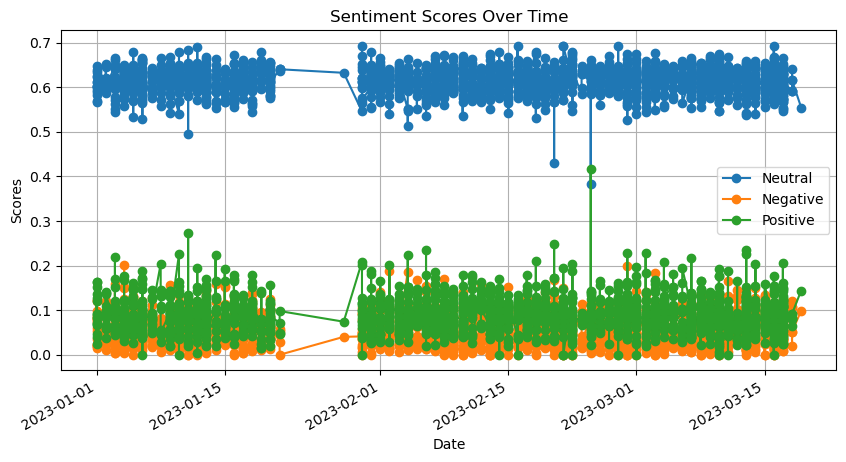

In [9]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and it has columns 'date', 'neu', 'neg', and 'pos'

# Set the date column as the index
df_prep.set_index('date', inplace=True)

# Plot the scores over time
df_prep[['neu_log', 'neg_log', 'pos_log']].plot(figsize=(10, 5), marker='o')
plt.xlabel('Date')
plt.ylabel('Scores')
plt.title('Sentiment Scores Over Time')
plt.legend(['Neutral', 'Negative', 'Positive'])
plt.grid(True)
plt.show()

In [ ]:
df_agg = df_prep.groupby('date').sum()
df_agg

## Daily Analysis:

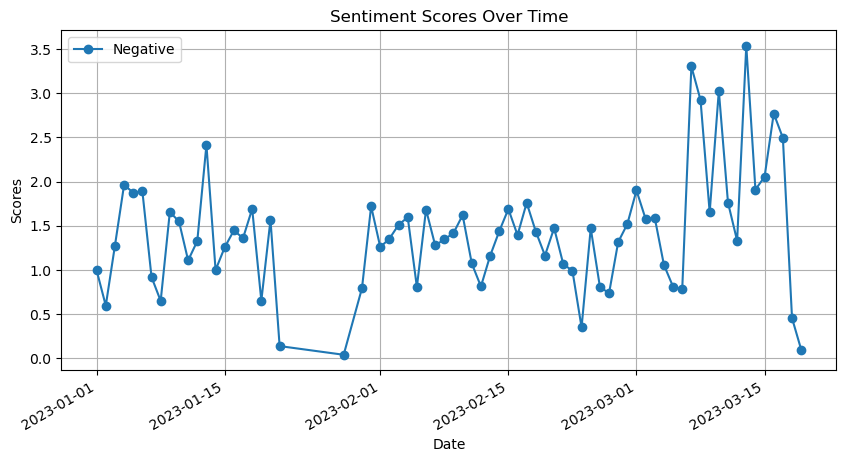

<Figure size 640x480 with 0 Axes>

In [10]:
df_agg = df_prep.groupby('date').sum()

# Plot the scores over time
df_agg[['neg_log']].plot(figsize=(10, 5), marker='o')
plt.xlabel('Date')
plt.ylabel('Scores')
plt.title('Sentiment Scores Over Time')
plt.legend([ 'Negative'])
plt.grid(True)
plt.show()
plt.savefig('sentiment_nltk_neg.png')

## Weekly Analysis:

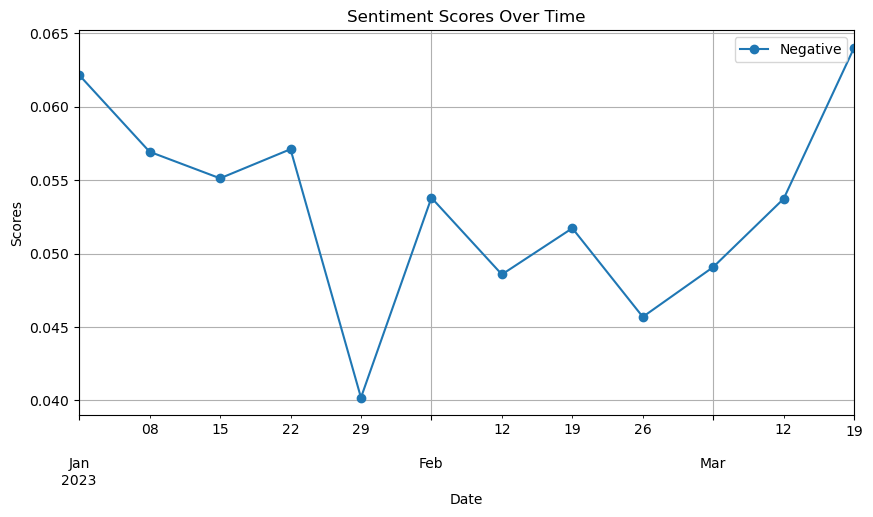

<Figure size 640x480 with 0 Axes>

In [11]:
df_prep['date'] = df_prep['published_parsed'].apply(convert_struct_time_to_date)
# Convert the 'date' column to a DatetimeIndex
df_prep['date'] = pd.to_datetime(df_prep['date'])
df_prep = df_prep.set_index('date')

# Resample to weekly frequency and sum the scores
df_agg = df_prep.resample('W').mean()# aggregate daily scores to weekly scores

# Plot the scores over time
df_agg[['neg_log']].plot(figsize=(10, 5), marker='o')
plt.xlabel('Date')
plt.ylabel('Scores')
plt.title('Sentiment Scores Over Time')
plt.legend([ 'Negative'])
plt.grid(True)
plt.show()
plt.savefig('sentiment_nltk_neg.png')

# Sentiment Analysis using loughran mcdonald dictionary:

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Load Loughran-McDonald dictionary
def load_loughran_mcdonald_dictionary(file_path):
    df_dict  = pd.read_excel(file_path)
    positive_words = set(df_dict[df_dict['Positive'] > 0]['Word'].str.lower())
    negative_words = set(df_dict[df_dict['Negative'] > 0]['Word'].str.lower())

    return positive_words, negative_words

def sentiment_score(text, positive_words, negative_words):
    words = word_tokenize(text)
    pos_count = sum(1 for word in tqdm(words) if word in positive_words)
    neg_count = sum(1 for word in tqdm(words) if word in negative_words)
    return pos_count - neg_count

# Load input data
df_prep_mc = pd.read_excel("C://Users//apuza//iCloudDrive//ProjJoul//prep_new.xlsx")
output_file = "C://Users//apuza//iCloudDrive//ProjJoul//sentiment_new_macdonald.xlsx"
dictionary_file = "C://Users//apuza//iCloudDrive//ProjJoul//dictionary//Loughran-McDonald_MasterDictionary_1993-2021.xlsx"


positive_words, negative_words = load_loughran_mcdonald_dictionary(dictionary_file)


# Calculate sentiment scores for each article
df_prep_mc['sentiment_score'] = df_prep['body'].apply(lambda text: sentiment_score(text, positive_words, negative_words))

# Save the results to a new Excel file
df_prep_mc.to_excel(output_file, index=False)

In [35]:
##change the date and time:
import pandas as pd
import time
import datetime
import re
import numpy as np
def convert_struct_time_to_date(struct_time_str):
    pattern = r'tm_year=(\d+), tm_mon=(\d+), tm_mday=(\d+)'
    match = re.search(pattern, struct_time_str)
    year, month, day = map(int, match.groups())
    return datetime.date(year, month, day)

df_prep_mc['date'] = df_prep['published_parsed'].apply(convert_struct_time_to_date)
df_prep_mc['date'] = pd.to_datetime(df_prep_mc['date'])
threshold_date = pd.to_datetime('2023-01-01')
df_prep_mc = df_prep_mc[df_prep_mc['date'] >= threshold_date]

# Normalize the scores
min_value = df_prep_mc['sentiment_score'].min()
max_value = df_prep_mc['sentiment_score'].max()
df_prep_mc['normalized_values'] = (df_prep_mc['sentiment_score'] - min_value) / (max_value - min_value)



# Apply log transformation
df_prep_mc['norm_log'] = np.log1p(df_prep_mc['normalized_values'])


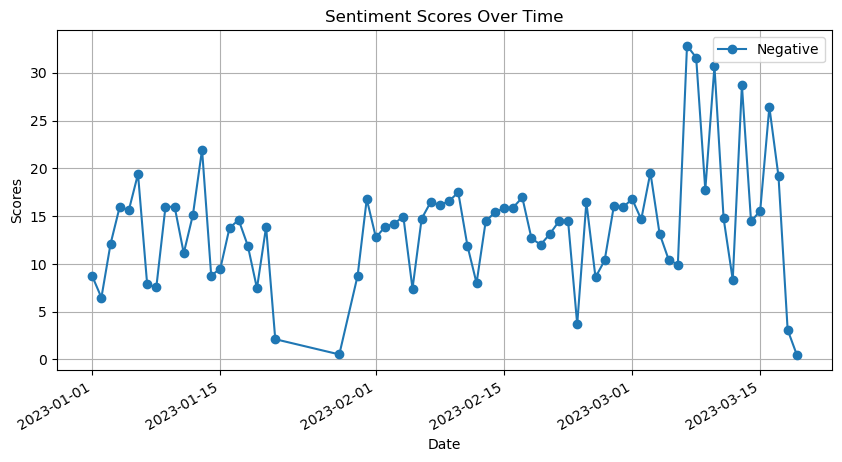

<Figure size 640x480 with 0 Axes>

In [37]:
df_agg_mc = df_prep_mc.groupby('date').sum()

import matplotlib.pyplot as plt

# Plot the scores over time
df_agg_mc[['norm_log']].plot(figsize=(10, 5), marker='o')
plt.xlabel('Date')
plt.ylabel('Scores')
plt.title('Sentiment Scores Over Time')
plt.legend([ 'Negative'])
plt.grid(True)
plt.show()
plt.savefig('sentiment_nltk_neg.png')